In [4]:
import matplotlib
import matplotlib.pyplot as pt
%matplotlib inline
matplotlib.style.use('ggplot')

import torch
import torch.optim as optim

from envs.my_mdp import StochasticMDPEnv
from envs.tetris import Tetris
from agents.my_hdqn_agent import hDQN, OptimizerSpec
from my_hdqn_learning import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
NUM_EPISODES = 1000
# NUM_EPISODES = 12000
BATCH_SIZE = 128
GAMMA = 0.99
REPLAY_MEMORY_SIZE = 10000
LR = 1e-4


optimizer_spec = OptimizerSpec(
    constructor=optim.AdamW,
    kwargs=dict(lr=LR, amsgrad=True),
)

exploration_schedule = LinearSchedule(5000, 0.1, 1)

num_rows, num_cols = 10, 4
env = Tetris(num_rows, num_cols)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
    num_goal=4,
    num_action=4 * num_cols,
    num_meta_in=num_rows * num_cols + 4*4
)

# env = StochasticMDPEnv()

In [6]:
agent, stats, visits = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)
torch.save(agent,f'agent {num_rows} {num_cols} {NUM_EPISODES}.pt')

/home/eric/pytorch-hdqn/agents/my_hdqn_agent.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return controller(Variable(state, volatile=True)).data.max(1)[1].cpu()
/home/eric/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


steps:    262 episode:    100 reward: 0.0 average: 9.48
goals_selection: [30. 22. 26. 27.]
steps:    485 episode:    200 reward: 0.0 average: 7.93
goals_selection: [61. 46. 50. 50.]
steps:    732 episode:    300 reward: 0.0 average: 6.95
goals_selection: [92. 70. 74. 73.]
steps:    992 episode:    400 reward: 0.0 average: 7.07
goals_selection: [128.  94. 105.  89.]
steps:   1256 episode:    500 reward: 0.0 average: 7.29
goals_selection: [160. 116. 140. 105.]
steps:   1554 episode:    600 reward: 0.0 average: 7.88
goals_selection: [205. 147. 160. 117.]
steps:   1815 episode:    700 reward: 0.0 average: 8.07
goals_selection: [247. 163. 183. 139.]
steps:   2079 episode:    800 reward: 0.0 average: 8.36
goals_selection: [302. 178. 207. 157.]
steps:   2377 episode:    900 reward: 0.0 average: 8.85
goals_selection: [368. 199. 223. 167.]
steps:   2630 episode:   1000 reward: 0.0 average: 8.65
goals_selection: [432. 217. 236. 181.]


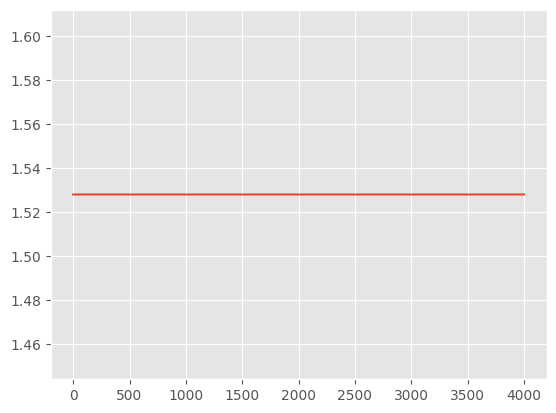

In [7]:
import numpy as np
episode_returns = stats.episode_rewards
window_size = 5000
moving_average = np.convolve(episode_returns, np.ones(window_size), 'valid') / window_size
pt.plot(moving_average)
pt.savefig('moving_average')
# print(sum(stats.episode_rewards))
# plot_episode_stats(stats)

In [8]:
agent = torch.load('agent 10 4 1000.pt')
print(agent.num_goal)

4
